# Introduction

### This model is used to predict the house price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statistics
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots

In [2]:
data=pd.read_csv('/content/kc_house_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [5]:
data.duplicated().sum()

0

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
data=data.drop(['id','zipcode'],axis=1)

# Exploratory Data Analysis (EDA)

In [11]:
#continious , descrete columns

cont=['price','bathrooms','sqft_living', 'sqft_lot','sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']
desc=['date','bedrooms','floors', 'waterfront', 'view', 'condition', 'grade','yr_built', 'yr_renovated', 'lat', 'long']

In [12]:
#Descriptive statistics to each continious column
for i in cont:
  mean=np.mean(data[i])
  median=np.median(data[i])
  std=np.std(data[i])
  max_num=np.max(data[i])
  min_num=np.min(data[i])
  print(i ,
        '\n mean = ', mean ,
        '\n median = ' ,median ,
        '\n standard divation = ', std ,
        '\n max = ',max_num ,
        '\n min = ',min_num ,
        '\n -------------------------')

price 
 mean =  540088.1417665294 
 median =  450000.0 
 standard divation =  367118.7031813723 
 max =  7700000.0 
 min =  75000.0 
 -------------------------
bathrooms 
 mean =  2.1147573219821405 
 median =  2.25 
 standard divation =  0.7701453398840542 
 max =  8.0 
 min =  0.0 
 -------------------------
sqft_living 
 mean =  2079.8997362698374 
 median =  1910.0 
 standard divation =  918.4196493828823 
 max =  13540 
 min =  290 
 -------------------------
sqft_lot 
 mean =  15106.967565816869 
 median =  7618.0 
 standard divation =  41419.55327262768 
 max =  1651359 
 min =  520 
 -------------------------
sqft_above 
 mean =  1788.3906907879516 
 median =  1560.0 
 standard divation =  828.071820187509 
 max =  9410 
 min =  290 
 -------------------------
sqft_basement 
 mean =  291.5090454818859 
 median =  0.0 
 standard divation =  442.56480392851824 
 max =  4820 
 min =  0 
 -------------------------
sqft_living15 
 mean =  1986.552491556008 
 median =  1840.0 
 stand

In [13]:
#Descriptive statistics of descrete column

for i in desc:
  mode=statistics.mode(data[i])
  max_cat=np.max(data[i])
  min_cat=np.min(data[i])
  print(i ,
        '\n mode = ',mode ,
        '\n max = ',max_cat ,
        '\n min = ',min_cat ,
        '\n -------------------------')

date 
 mode =  20140623T000000 
 max =  20150527T000000 
 min =  20140502T000000 
 -------------------------
bedrooms 
 mode =  3 
 max =  33 
 min =  0 
 -------------------------
floors 
 mode =  1.0 
 max =  3.5 
 min =  1.0 
 -------------------------
waterfront 
 mode =  0 
 max =  1 
 min =  0 
 -------------------------
view 
 mode =  0 
 max =  4 
 min =  0 
 -------------------------
condition 
 mode =  3 
 max =  5 
 min =  1 
 -------------------------
grade 
 mode =  7 
 max =  13 
 min =  1 
 -------------------------
yr_built 
 mode =  2014 
 max =  2015 
 min =  1900 
 -------------------------
yr_renovated 
 mode =  0 
 max =  2015 
 min =  0 
 -------------------------
lat 
 mode =  47.6846 
 max =  47.7776 
 min =  47.1559 
 -------------------------
long 
 mode =  -122.29 
 max =  -121.315 
 min =  -122.519 
 -------------------------


In [18]:
#visualize descriptive statistics for price
# sns.boxplot(x=data['price'])
# plt.xlabel('Price')
# plt.title('Visualize of Descriptive Statistics for Price')
# plt.show()

fig=px.box(x=data['price'])
fig.update_layout(xaxis_title='Price',
                  title='visualize of descriptive statistics for price')
fig.show()

In [20]:
fig=px.histogram(x=data['price'])
fig.update_layout(xaxis_title='Price',
                  title='visualize of descriptive statistics for price')
fig.show()

In [21]:
#visualize descriptive statistics for Bedrooms
fig=px.box(x=data['bedrooms'])
fig.update_layout(xaxis_title='Bedrooms',
                  title='visualize of descriptive statistics for Badrooms')
fig.show()

In [22]:
fig=px.histogram(x=data['bedrooms'])
fig.update_layout(xaxis_title='Badeooms',
                  title='visualize of descriptive statistics for Badrooms')
fig.show()

In [23]:
#visualize of descriptive statistics for Bathrooms
fig=px.box(x=data['bathrooms'])
fig.update_layout(xaxis_title='Bathrooms',
                  title='visualize of descriptive statistics for Bathrooms')
fig.show()

In [24]:
fig=px.histogram(x=data['bathrooms'])
fig.update_layout(xaxis_title='Bathrooms',
                  title='visualize of descriptive statistics for Bathrooms')
fig.show()

In [25]:
#visualize of descriptive statistics for sqft_living
fig=px.box(x=data['sqft_living'])
fig.update_layout(xaxis_title='sqft living',
                  title='visualize of descriptive statistics for sqft living')
fig.show()

In [26]:
fig=px.histogram(x=data['sqft_living'])
fig.update_layout(xaxis_title='sqft living',
                  title='visualize of descriptive statistics for sqft living')
fig.show()

In [27]:
#visualize of descriptive statistics for sqft lot
fig=px.box(x=data['sqft_lot'])
fig.update_layout(xaxis_title='sqft lot',
                  title='visualize of descriptive statistics for sqft lot ')
fig.show()

In [28]:
fig=px.histogram(x=data['sqft_lot'])
fig.update_layout(xaxis_title='sqft lot',
                  title='visualize of descriptive statistics for sqft lot ')
fig.show()

In [29]:
#visualize of descriptive statistics for floors
fig=px.box(x=data['floors'])
fig.update_layout(xaxis_title='floors',
                  title='visualize of descriptive statistics for floors')
fig.show()

In [30]:
fig=px.histogram(x=data['floors'])
fig.update_layout(xaxis_title='floors',
                  title='visualize of descriptive statistics for floors')
fig.show()

In [31]:
#visualize of descriptive statistics for condition
fig=px.box(x=data['condition'])
fig.update_layout(xaxis_title='condition',
                  title='visualize of descriptive statistics for condition')
fig.show()

In [32]:
fig=px.histogram(x=data['condition'])
fig.update_layout(xaxis_title='condition',
                  title='visualize of descriptive statistics for condition')
fig.show()

In [33]:
#visualize descriptive statistics for sqft above
fig=px.box(x=data['sqft_above'])
fig.update_layout(xaxis_title='sqft_above',
                  title='visualize of descriptive statistics for sqft above')
fig.show()

In [34]:
fig=px.histogram(x=data['sqft_above'])
fig.update_layout(xaxis_title='sqft_above',
                  title='visualize of descriptive statistics for sqft above')
fig.show()

<Axes: >

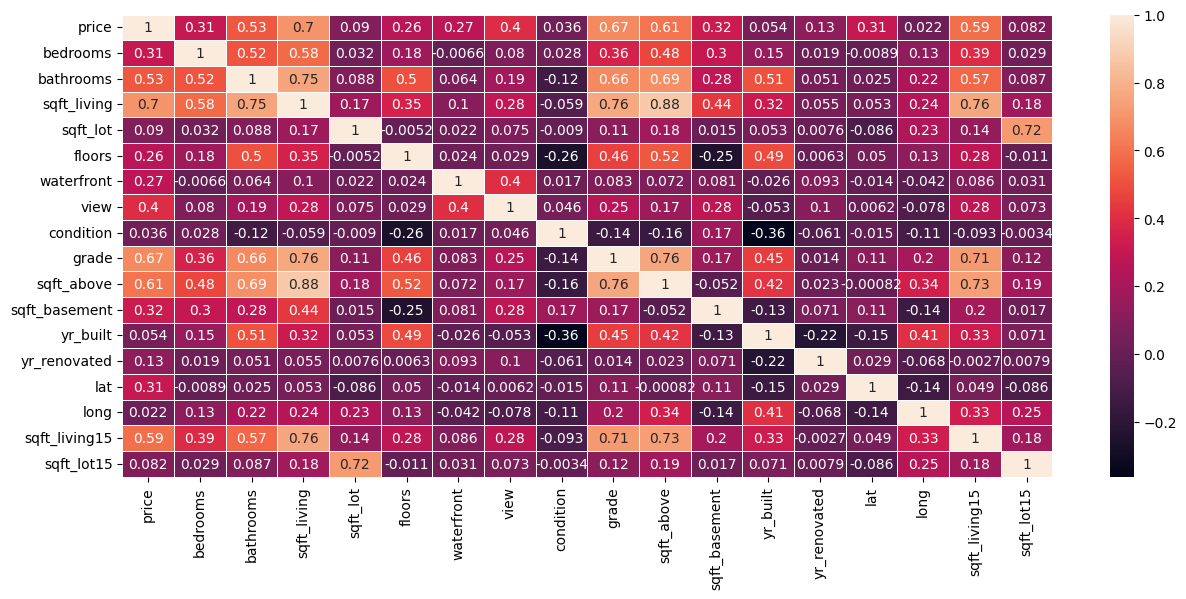

In [35]:
#corellation analysis
plt.figure(figsize=(15,6))
corr=data.drop('date',axis=1).corr(method='pearson')
sns.heatmap(corr,
            annot=True ,
            linewidths=0.5)

In [36]:
#Distribution between sqft_living and grade
fig=px.scatter(data,
               y='sqft_living',
               x='sqft_above',
               title='Distribution between sqft_living and sqft above',

               )
fig.update_layout(xaxis_title='sqft above',
           yaxis_title='sqft living')


In [37]:
#Distribution between bedrooms and bathrooms
fig=px.scatter(data,
               y='bedrooms',
               x='bathrooms',
               title='Distribution between bedrooms and bathrooms',
               )
fig.update_layout(xaxis_title='bathrooms',
           yaxis_title='bedrooms')

In [38]:
#Distribution between price and grade
fig=px.scatter(data,
               x='grade',
               y='price',
               title='Distribution between price and grade',
               )
fig.update_layout(xaxis_title='grade',
           yaxis_title='price')

In [39]:
#Distribution between sqft_living and grade
fig=px.scatter(data,
               y='grade',
               x='sqft_living',
               title='Distribution between sqft_living and grade',
               )
fig.update_layout(xaxis_title='sqft_living',
           yaxis_title='grade')

In [40]:
# calculate top 20 of price
top20=data['price'].sort_values(ascending=False).head(20).min()
#Sample of the highest price for a home by continous features
data_top20_cont=data[data['price']>top20][['sqft_living','bedrooms','bathrooms','grade','sqft_above','price']]
print(data_top20_cont)

       sqft_living  bedrooms  bathrooms  grade  sqft_above      price
1164          8010         5       5.25     12        5990  5110800.0
1315          7390         6       6.00     12        5000  5300000.0
1448          8000         5       5.00     12        6720  5350000.0
2085          5770         4       4.25     11        5770  3850000.0
2626          6640         5       5.50     12        6350  4500000.0
3914         10040         5       4.50     11        7680  7062500.0
4149          7080         4       5.50     12        5760  4000000.0
4411          9200         5       5.75     13        6200  5570000.0
6508          5480         6       4.75     11        3910  3650000.0
7035          7050         5       5.50     13        4320  3800000.0
7252         12050         6       8.00     13        8570  7700000.0
8092          9640         5       6.75     12        4820  4668000.0
8638          6430         4       3.00     12        6430  4489000.0
9254          9890  

In [41]:
fig = make_subplots(rows=3, cols=2, subplot_titles=('plot 1 : sqft living vs top 20 of price','plot 2 : bedrooms vs top 20 of price',
                                                          'plot 3 : bathrooms vs top 20 of price','plot 4 : grade vs top 20 of price',
                                                          'plot 3 : sqft above vs top 20 of price'))

fig.add_trace(go.Scatter(x=data_top20_cont['sqft_living'].tolist(),
                         y=data_top20_cont['price'].tolist(),
                         mode='markers',
                         name='Sqft Living'),row=1,col=1)

fig.add_trace(go.Scatter(x=data_top20_cont['bedrooms'].tolist(),
                         y=data_top20_cont['price'].tolist(),
                         mode='markers',
                         name='Bedrooms'),row=1,col=2)

fig.add_trace(go.Scatter(x=data_top20_cont['bathrooms'].tolist(),
                         y=data_top20_cont['price'].tolist(),
                         mode='markers',
                         name='Bathrooms'),row=2,col=1)

fig.add_trace(go.Scatter(x=data_top20_cont['grade'].tolist(),
                         y=data_top20_cont['price'].tolist(),
                         mode='markers',
                         name='Grade'),row=2,col=2)

fig.add_trace(go.Scatter(x=data_top20_cont['sqft_above'].tolist(),
                         y=data_top20_cont['price'].tolist(),
                         mode='markers',
                         name='Sqft Above'),row=3,col=1)


fig.update_layout(
    title='What features made these houses more expensive?',

)

fig.show()

### Categorical and Descrite Features Analysis

In [42]:
#Distribution of view feature
fig=px.histogram(x=data['view'])
fig.update_layout(xaxis_title='View',
                  title='Distribution of view feature')
fig.show()

In [43]:
#Distribution of view feature vs price

fig=px.line(x=data.groupby('view')['price'].mean().index,
            y=data.groupby('view')['price'].mean(),
            title='Distribution between price and view',
               )
fig.update_layout(xaxis_title='view',
           yaxis_title='price')

In [44]:
#Distribution of year built feature
fig=px.histogram(x=data['yr_built'])
fig.update_layout(xaxis_title='built feature',
                  title='Distribution of year built feature')
fig.show()

In [45]:
#Distribution of built feature vs price

fig=px.line(x=data.groupby('yr_built')['price'].mean().index,
            y=data.groupby('yr_built')['price'].mean(),
            title='Distribution between price and yr built',
               )
fig.update_layout(xaxis_title='yr built',
           yaxis_title='price')

In [46]:
#Why are houses built before 1940 relatively high in selling price?
data[data['yr_built']<1940][['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement']]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
2,2,1.00,770,10000,1.0,0,0,3,6,770,0
12,3,1.00,1430,19901,1.5,0,0,4,7,1430,0
14,5,2.00,1810,4850,1.5,0,0,3,7,1810,0
17,4,1.00,1600,4300,1.5,0,0,4,7,1600,0
18,2,1.00,1200,9850,1.0,0,0,4,7,1200,0
...,...,...,...,...,...,...,...,...,...,...,...
20583,4,2.75,2700,6000,2.0,0,0,4,8,2100,600
20779,4,1.00,1200,2171,1.5,0,0,3,7,1200,0
20780,4,1.00,1200,2171,1.5,0,0,3,7,1200,0
21043,1,1.00,720,3166,1.0,0,0,3,6,720,0


from matplotlib import pyplot as plt
_df_0['bedrooms'].plot(kind='hist', bins=20, title='bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['bathrooms'].plot(kind='hist', bins=20, title='bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['sqft_living'].plot(kind='hist', bins=20, title='sqft_living')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['sqft_lot'].plot(kind='hist', bins=20, title='sqft_lot')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='bedrooms', y='bathrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='bathrooms', y='sqft_living', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='sqft_living', y='sqft_lot', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='sqft_lot', y='floors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['bedrooms'].plot(kind='line', figsize=(8, 4), title='bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['bathrooms'].plot(kind='line', figsize=(8, 4), title='bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['sqft_living'].plot(kind='line', figsize=(8, 4), title='sqft_living')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['sqft_lot'].plot(kind='line', figsize=(8, 4), title='sqft_lot')
plt.gca().spines[['top', 'right']].set_visible(False)

In [47]:
#Explanation for Why are houses built before 1940 relatively high in selling price?
filtered_yr_built = data[data['yr_built'] < 1940]
fig = make_subplots(rows=2, cols=2, subplot_titles=("Plot 1: Bedrooms vs year built", "Plot 2: Sqft Living vs year built",
                                                    "Plot 3: Sqft above vs year built", "Plot 4: Grade vs year built"))



fig.add_trace(go.Line(y=filtered_yr_built.groupby('yr_built')['bedrooms'].median(),
                         x=filtered_yr_built.groupby('yr_built')['bedrooms'].median().index,),row=1, col=1)


fig.add_trace(go.Line(y=filtered_yr_built.groupby('yr_built')['sqft_living'].mean(),
                         x=filtered_yr_built.groupby('yr_built')['sqft_living'].mean().index),row=1, col=2)

fig.add_trace(go.Line(y=filtered_yr_built.groupby('yr_built')['sqft_above'].mean(),
                         x=filtered_yr_built.groupby('yr_built')['sqft_above'].mean().index),row=2, col=1)

fig.add_trace(go.Line(y=filtered_yr_built.groupby('yr_built')['grade'].median(),
                         x=filtered_yr_built.groupby('yr_built')['grade'].median().index),row=2, col=2)

fig.data[0].name='Bedrooms'
fig.data[1].name='Sqft living'
fig.data[2].name='Sqft above'
fig.data[2].name='Grade'

fig.update_layout(title='Why are houses built before 1940 relatively high in selling price?')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [48]:
#Distribution of lat feature
fig=px.histogram(x=data['lat'])
fig.update_layout(xaxis_title='lat',
                  title='Distribution of lat feature')
fig.show()

In [49]:
#Distribution of lat feature vs price

fig=px.line(x=data.groupby('lat')['price'].mean().index,
            y=data.groupby('lat')['price'].mean(),
            title='Distribution between price and lat',
               )
fig.update_layout(xaxis_title='lat',
           yaxis_title='price')

In [50]:
#Distribution of long feature
fig=px.histogram(x=data['long'])
fig.update_layout(xaxis_title='long',
                  title='Distribution of long feature')
fig.show()

In [51]:
#Distribution of long feature vs price

fig=px.line(x=data.groupby('long')['price'].mean().index,
            y=data.groupby('long')['price'].mean(),
            title='Distribution between price and long',
               )
fig.update_layout(xaxis_title='long',
           yaxis_title='price')

# Report Data Analysis
1-What are the features that contribute the most to increasing house prices?

    Interpretation
    
    1-Living Space
    
    2-Quality of Construction
    
    3-Floor Area

2-House price range between:

    Interpretation   
    75k : 7.7M

3- What features made these houses more expensive?

    Interpretation
    
    1-Living Space--> Not less than 5k
    
    2-Bedrooms--> Not less than  4
    
    3-Quality of construction--> Not less 11
    
    4-Floor eara --> Not less 4000

4- Why are houses built before 1940 relatively high in selling price?

    Interpretation
    
    1-Living Space--> ave= 1775
    
    2-Bedrooms--> median=  4
    
    3-Quality of construction--> ave= 1441
    
    4-Floor eara --> median =7

# Machine Learning

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score ,mean_absolute_error

In [53]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [57]:
#convert view column for binary
data['view Binary']=0
data['view Binary']=data.loc[data['view']>0,'view Binary']=1

In [61]:
#decrease variable of grade column
data['grade 2']=pd.cut(data['grade'],bins=[-np.inf,5,9,np.inf],labels=[1,2,3])

In [62]:
#decrease variable of sqft_living column
data['sqft_living 2']=pd.cut(data['sqft_living'],bins=[-np.inf,np.quantile(data['sqft_living'],[0,0.25,.50,.75,1])[1],
                                                       np.quantile(data['sqft_living'],[0,0.25,.50,.75,1])[2],
                                                       np.quantile(data['sqft_living'],[0,0.25,.50,.75,1])[3],
                                                       np.inf],labels=[1,2,3,4])

### Data Modelling

In [63]:
#split data for features and target
x=data.drop(['date','price'],axis=1)
y=data['price']

In [64]:
#standrad scale
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [65]:
#split for test and train
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [66]:
#evaluation
def evaluate(actual , predict ):
  accuracy=r2_score(actual, predict)
  absolute_error=mean_absolute_error(actual, predict)
  return accuracy, absolute_error

In [67]:
#models dict
models_dict={

             'Linear Regression':LinearRegression(),
             'SVR':SVR(),
             'Random Forest':RandomForestRegressor(),
             'XGBoost':XGBRegressor(),
             'decision tree':DecisionTreeRegressor()
}

In [68]:
#train models
acc_train_list=[]
acc_test_list=[]

error_train_list=[]
error_test_list=[]

models=[]

for i in range(len(list(models_dict))):
  model=list(models_dict.values())[i]
  #fit
  model.fit(xtrain,ytrain)
  #prediction train
  predict_train=model.predict(xtrain)
  #prediction test
  predict_test = model.predict(xtest)

  #evaluation train
  acc_train ,error_train=evaluate(ytrain ,predict_train)

  #evaluation test
  acc_test, error_test=evaluate(ytest,predict_test)
  acc_train_list.append(acc_train )
  acc_test_list.append(acc_test)

  error_train_list.append(error_train)
  error_test_list.append(error_test)

  print(list(models_dict.keys())[i],'\n Accuracy train:' ,acc_train_list[i] ,'\n','\n Error train:' ,error_train ,'\n -----------------------------------------------')


  print(list(models_dict.keys())[i],'\n Accuracy test:' ,acc_test_list[i] ,'\n','\n Error test:' ,error_test ,'\n -----------------------------------------------------')


Linear Regression 
 Accuracy train: 0.7178150366824965 
 
 Error train: 120662.9389250879 
 -----------------------------------------------
Linear Regression 
 Accuracy test: 0.712870954332526 
 
 Error test: 125741.70044488204 
 -----------------------------------------------------
SVR 
 Accuracy train: -0.057988729121292826 
 
 Error train: 218731.01519353088 
 -----------------------------------------------
SVR 
 Accuracy test: -0.05593292124753879 
 
 Error test: 227418.57650112704 
 -----------------------------------------------------
Random Forest 
 Accuracy train: 0.9821545703571146 
 
 Error train: 26292.641361089343 
 -----------------------------------------------
Random Forest 
 Accuracy test: 0.8619928071522271 
 
 Error test: 72459.07479465817 
 -----------------------------------------------------
XGBoost 
 Accuracy train: 0.9766136606971874 
 
 Error train: 39028.322449847976 
 -----------------------------------------------
XGBoost 
 Accuracy test: 0.8702511530898067 


In [69]:
fig=go.Figure()
fig.add_trace(go.Line(y=acc_train_list,
                      x=list(models_dict.keys())))


fig.add_trace(go.Line(y=acc_test_list,
                      x=list(models_dict.keys())))
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


